In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [2]:
DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide"
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"
pref=DATA+'/Baf.single_gene'

In [3]:
adata=sc.read(pref+'.guide_qc.h5ad')
adata

Only considering the two last: ['.guide_qc', '.h5ad'].
Only considering the two last: ['.guide_qc', '.h5ad'].


AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

In [18]:
cells

Index(['AACCCAAGTTGCTCGG-1-0', 'AACCTTTGTGGAAGTC-1-0', 'AAGAACATCTACCCAC-1-0',
       'ACGGAAGCAATACAGA-1-0', 'ACTATCTCACAAGCAG-1-0', 'ACTATTCAGTGTTCAC-1-0',
       'AGGATCTGTCGGCTAC-1-0', 'AGTGACTGTCTTCCGT-1-0', 'AGTTAGCCATCAGCAT-1-0',
       'ATCCCTGGTGCTCCGA-1-0',
       ...
       'TGGTACATCCACGTGG-1-14', 'TGTAAGCAGAAGATCT-1-14',
       'TGTGATGAGAGGACTC-1-14', 'TGTGGCGGTGTCCGTG-1-14',
       'TTACCGCAGTTTGTCG-1-14', 'TTAGGGTTCTGTCGTC-1-14',
       'TTCCGTGGTTCTCTAT-1-14', 'TTGAACGTCAACCTCC-1-14',
       'TTGGGCGGTCACTCTC-1-14', 'TTTACTGAGAAGATCT-1-14'],
      dtype='object', length=1371)

In [20]:
adata.raw[cells,gene].X.toarray()

array([[0.44052717],
       [0.74210495],
       [1.023818  ],
       ...,
       [1.3204478 ],
       [0.5859437 ],
       [0.34993196]], dtype=float32)

Index(['AAACCCAAGAGAGGTA-1-0', 'AAACCCACACGGTGTC-1-0', 'AAACCCACAGATTAAG-1-0',
       'AAACGCTCAGAGAATT-1-0', 'AAACGCTCATCCTTCG-1-0', 'AAACGCTTCTAGACCA-1-0',
       'AAAGGATAGTTGGAAT-1-0', 'AAAGGATCAGAGGCAT-1-0', 'AAAGGGCTCAAACGAA-1-0',
       'AAATGGACAGTCGAGA-1-0',
       ...
       'TTTCAGTGTGCGTGCT-1-14', 'TTTCAGTTCTAGTGTG-1-14',
       'TTTCATGAGATGCCGA-1-14', 'TTTCATGGTGGGTTGA-1-14',
       'TTTGATCAGGCTCTCG-1-14', 'TTTGGTTCAGACCAGA-1-14',
       'TTTGGTTTCGGAAGGT-1-14', 'TTTGTTGCACCACTGG-1-14',
       'TTTGTTGGTAACCCTA-1-14', 'TTTGTTGTCCATCGTC-1-14'],
      dtype='object', length=14800)
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ARID1A v.s. ARID1B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=1.461e+08
Index(['AAACCCAAGAGAGGTA-1-0', 'AAACCCACACGGTGTC-1-0', 'AAACCCACAGATTAAG-1-0',
       'AAACGCTCAGAGAATT-1-0', 'AAACGC

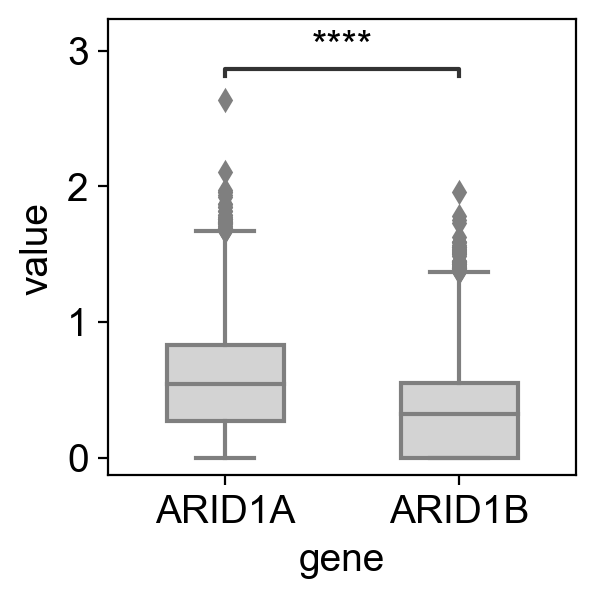

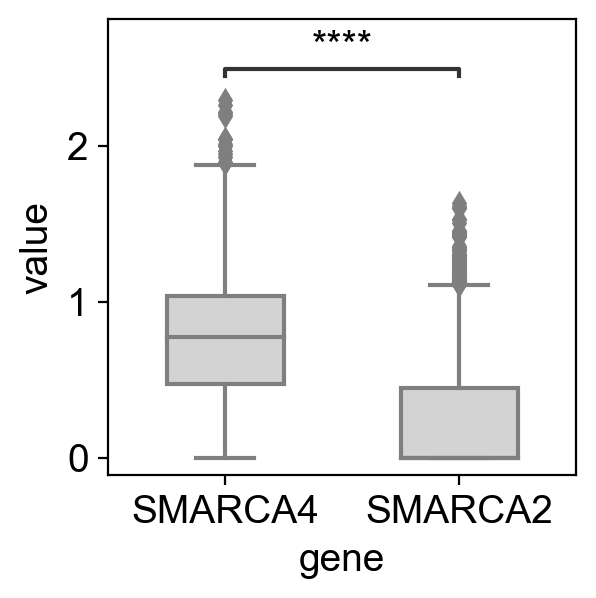

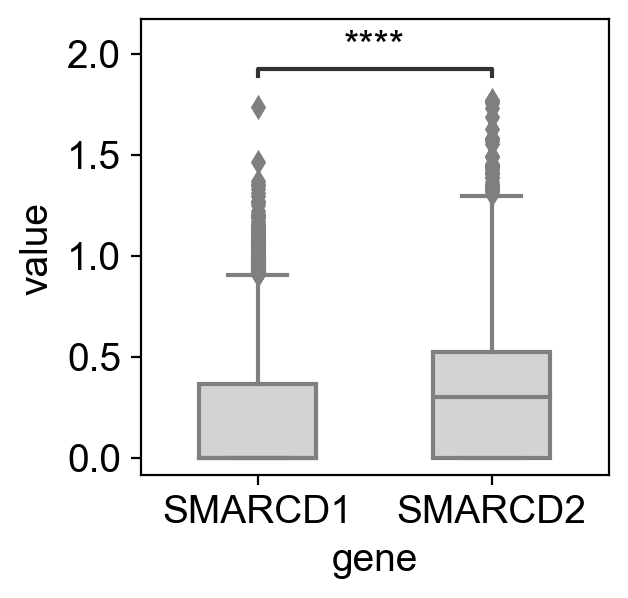

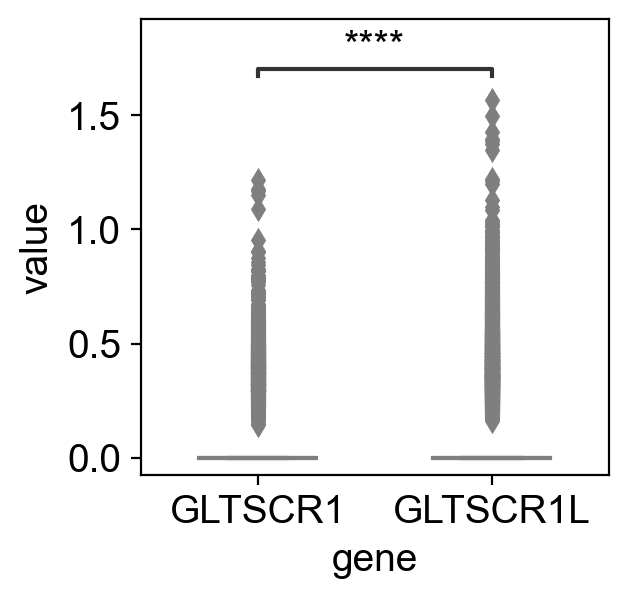

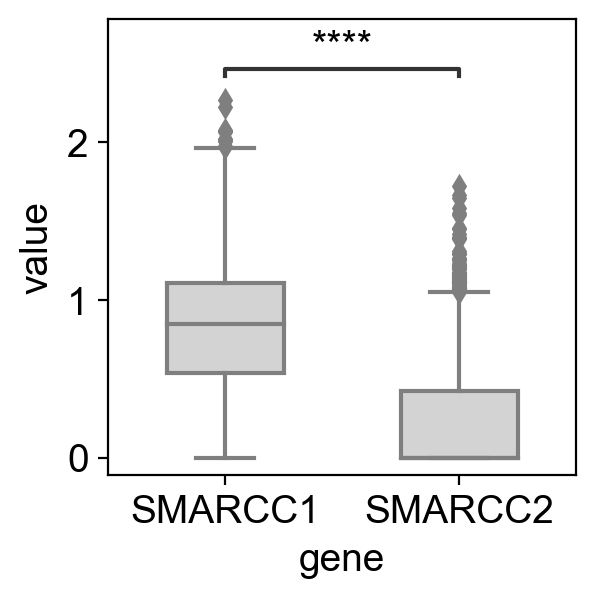

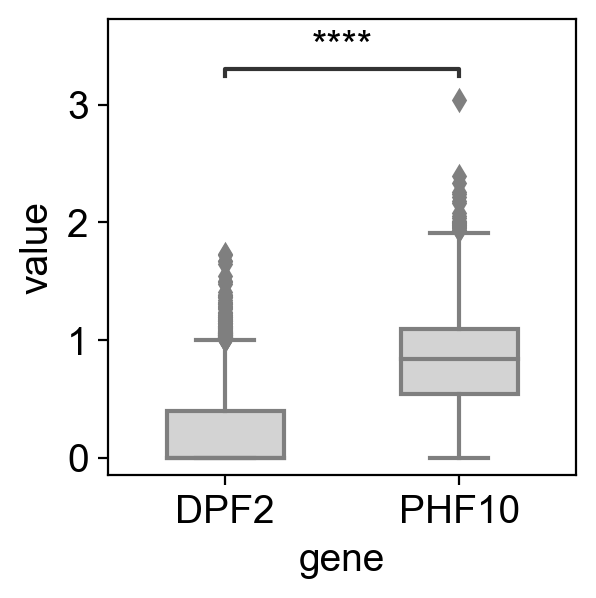

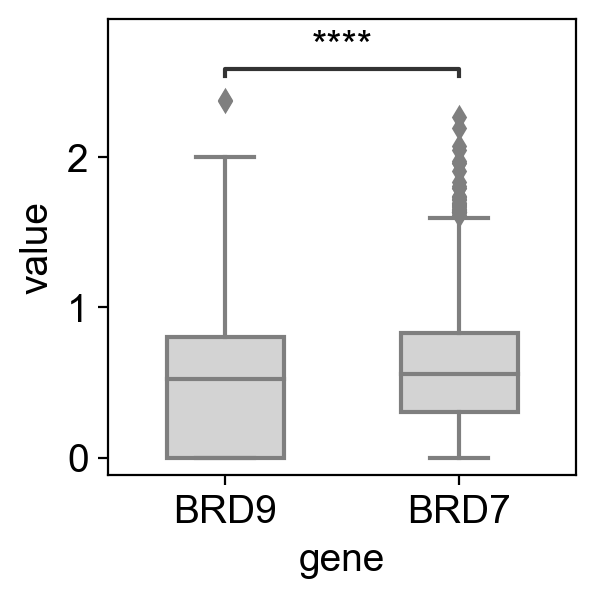

In [35]:
gene1='ARID1A'
gene2='ARID1B'
condition='unassigned'

for genes in [('ARID1A','ARID1B'),('SMARCA4','SMARCA2'),
              ('SMARCD1','SMARCD2'),('GLTSCR1','GLTSCR1L'),
              ('SMARCC1','SMARCC2'),('DPF2','PHF10'),('BRD9','BRD7'),
             ]:
    gene1=genes[0]
    gene2=genes[1]

    cells=adata.obs_names[adata.obs['gene.compact']==condition]
    print(cells)

    df=pd.DataFrame(columns=['gene','value'])
    for gene in [gene1,gene2]:
        vals=adata.raw[cells,gene].X.toarray().flatten()
        df_here=pd.DataFrame({'gene':gene,'value':vals})
        df=pd.concat([df,df_here])

    import seaborn as sns
    from statannot import add_stat_annotation

    fig,plots=plt.subplots(1)
    fig.set_size_inches(3,3)

    sns.boxplot(data=df,x='gene',y='value',
               order=[gene1,gene2],
                color='lightgray',
               #palette=palette,
                ax=plots,width=0.5)
    plt.grid(False)

    box_pairs=[(gene1,gene2),
              ]
    a=add_stat_annotation(plots,data=df,x='gene',y='value',
                        box_pairs=box_pairs,order=[gene1,gene2],
                        test='Mann-Whitney', #loc='outside',
                          verbose=2)

    plt.savefig(FIGS+'.boxexpr'+gene1+'.vs.'+gene2+'.pdf',transparent=True,bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ARID1A v.s. ARID1B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.219e-02 U_stat=2.500e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SMARCA4 v.s. SMARCA2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.219e-02 U_stat=2.500e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SMARCD1 v.s. SMARCD2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.219e-02 U_stat=0.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p

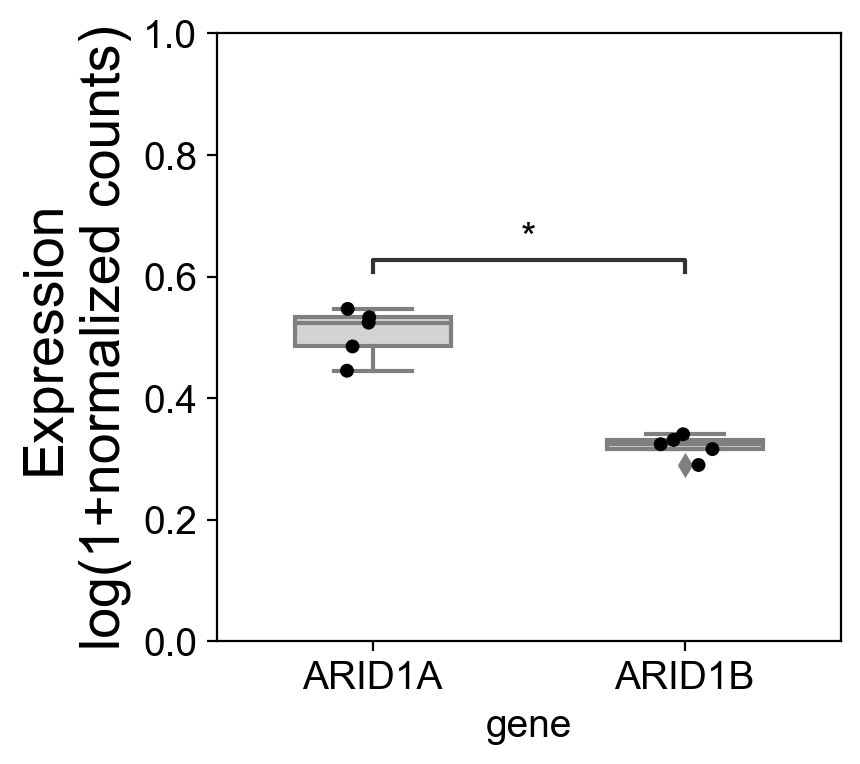

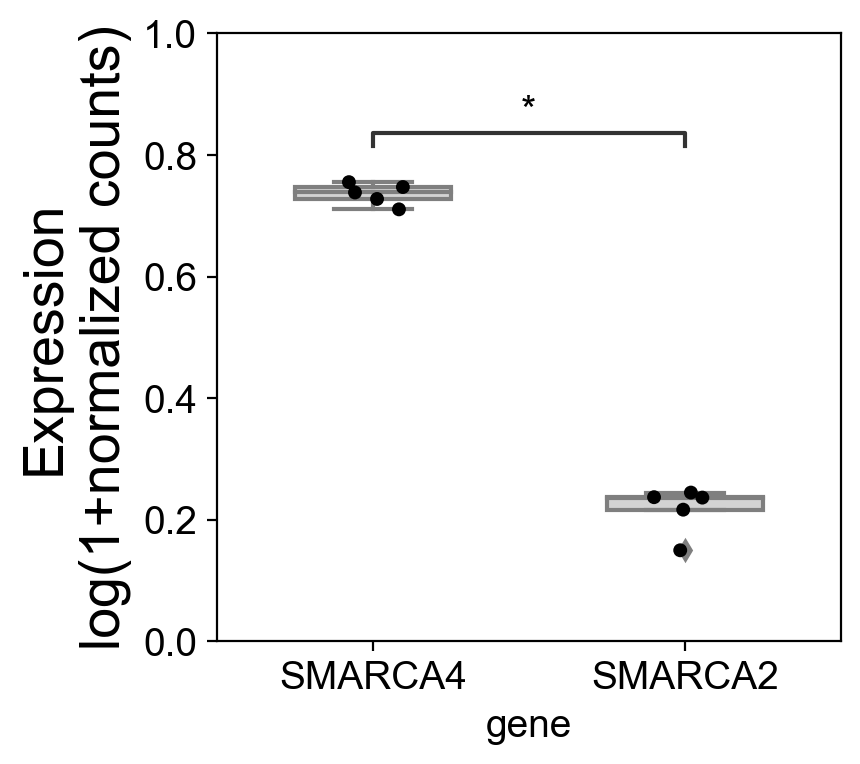

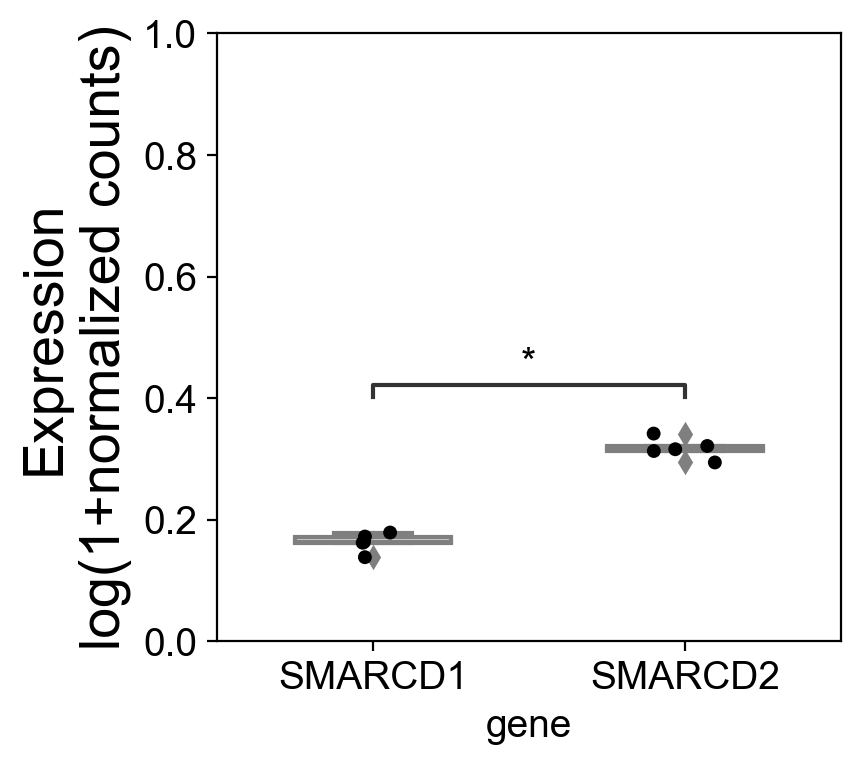

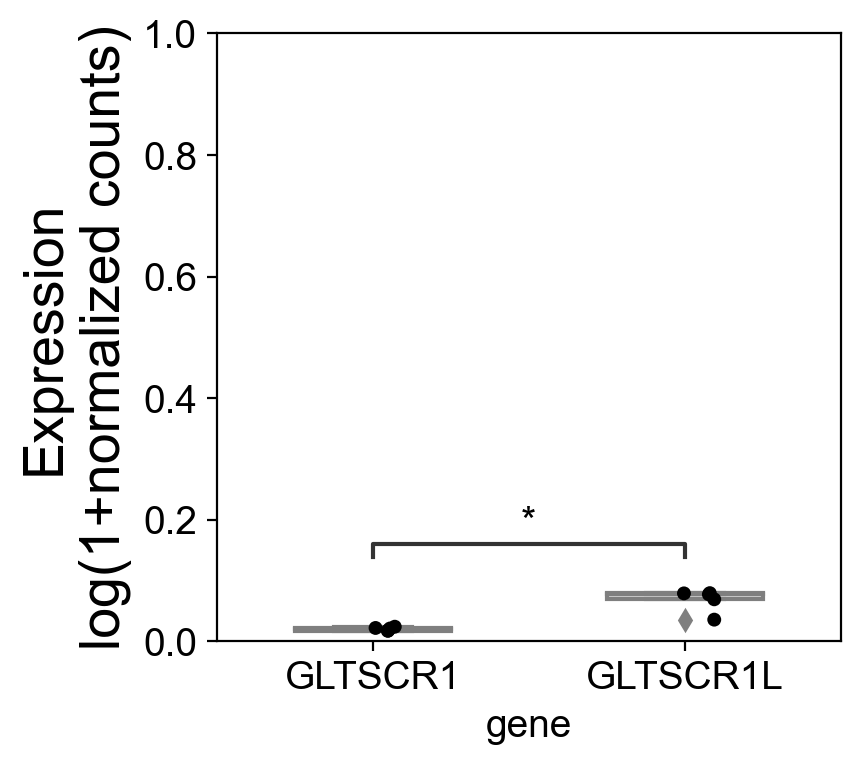

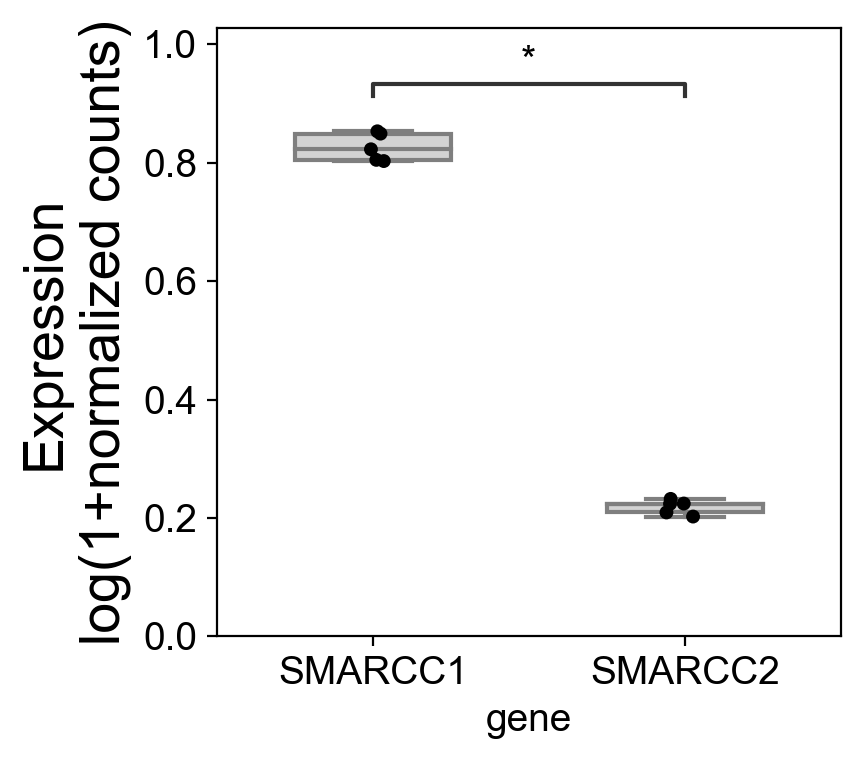

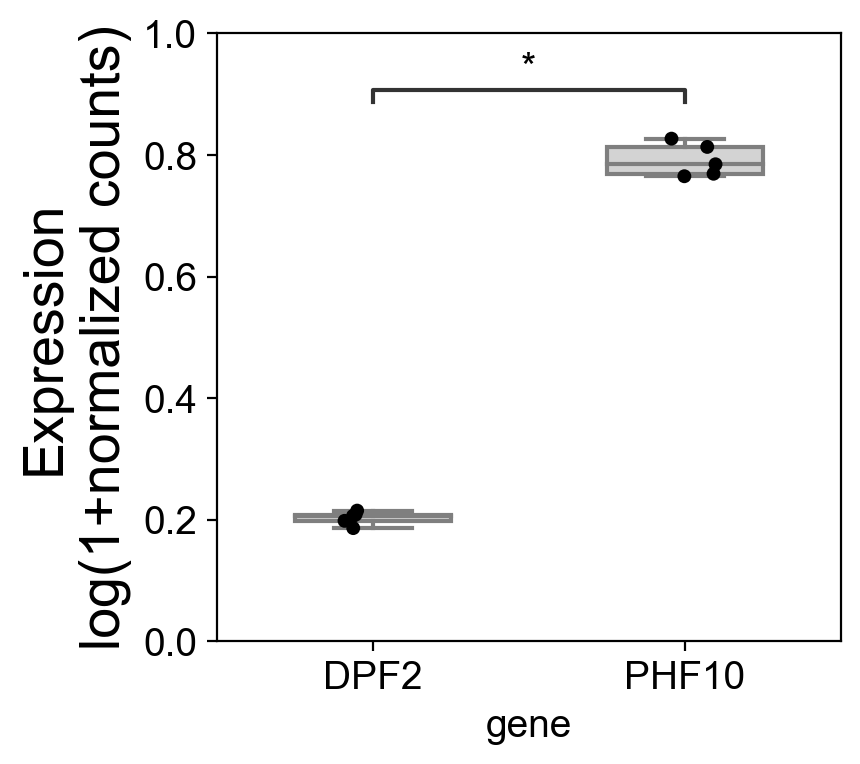

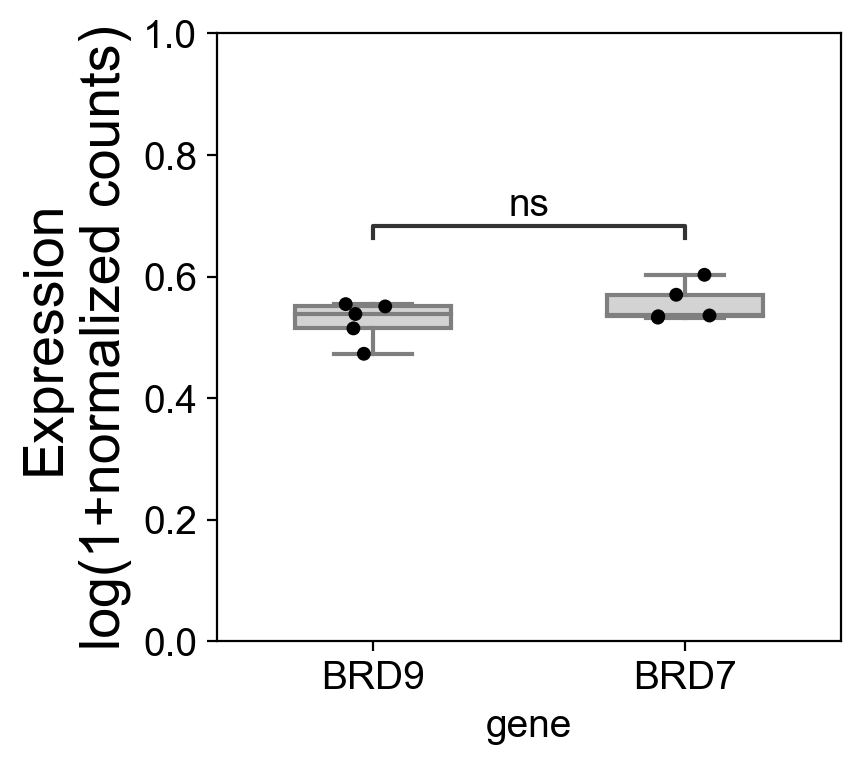

In [42]:

gene1='ARID1A'
gene2='ARID1B'
condition='unassigned'

ntcs=['NTC2_IG216151', 'NTC5_mNTC100A67005', 'NTC6_IG1216445', 'NTC7_IG1144056', 'NTC1_IG345439']

for genes in [('ARID1A','ARID1B'),('SMARCA4','SMARCA2'),
              ('SMARCD1','SMARCD2'),('GLTSCR1','GLTSCR1L'),
              ('SMARCC1','SMARCC2'),('DPF2','PHF10'),('BRD9','BRD7'),
             ]:
    gene1=genes[0]
    gene2=genes[1]
    
    
    df=pd.DataFrame(columns=['gene','control','mean_expr'])
    
    for p in [gene1,gene2]:
        exprs=[]
        for ntc in ntcs:
            cells=list(adata[adata.obs['guide']==ntc,:].obs_names)
            vals=adata.raw[cells,p].X.toarray().flatten()
            exprs.append(np.mean(vals))
        df_here=pd.DataFrame({'gene':p,
                            'control':'control',
                            'mean_expr':exprs})
        df=pd.concat([df,df_here],axis=0)
    

    import seaborn as sns
    from statannot import add_stat_annotation

    fig,plots=plt.subplots(1)
    fig.set_size_inches(4,4)

    sns.boxplot(data=df,x='gene',y='mean_expr',
               order=[gene1,gene2],
                color='lightgray',
               #palette=palette,
                ax=plots,width=0.5)
    plt.grid(False)

    sns.stripplot(x='gene',y='mean_expr',data=df,ax=plots,
                 palette={gene1:'black',gene2:'black'})
    plt.ylabel('Expression\nlog(1+normalized counts)',fontsize=20)
    plt.ylim(0,1)
    
    box_pairs=[(gene1,gene2),
              ]
    a=add_stat_annotation(plots,data=df,x='gene',y='mean_expr',
                        box_pairs=box_pairs,order=[gene1,gene2],
                        test='Mann-Whitney', #loc='outside',
                          verbose=2)

    plt.savefig(FIGS+'boxexpr'+gene1+'.vs.'+gene2+'.pdf',transparent=True,bbox_inches='tight')











In [41]:
FIGS+'.boxexpr'+gene1+'.vs.'+gene2+'.pdf'

'/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/.boxexprBRD9.vs.BRD7.pdf'